# SUP ML 2 - MODEL

# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# Carga clean data

In [ ]:
df = pd.read_pickle(r'G:\.shortcut-targets-by-id\1bm75_bWu9x17MEqz4s0y41zSeZIOecxs\Capstone Project\EasyMoney\Project Files\Propensión compra\04_df_preprocessed_ToModel_pickles\V2_debit_card_preprocessing_model_propension_compra_fulldf.pkl')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5506551 entries, (15891, Timestamp('2018-07-28 00:00:00')) to (1548207, Timestamp('2019-04-28 00:00:00'))
Data columns (total 48 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   active_customer             float64
 1   region_code                 int64  
 2   age                         int8   
 3   salary                      float64
 4   age_group                   int8   
 5   long_term_deposit           int8   
 6   credit_card                 int8   
 7   pension_plan                int8   
 8   payroll_account             int8   
 9   emc_account                 int8   
 10  debit_card                  int8   
 11  em_acount                   int8   
 12  tenencia                    int8   
 13  sale_em_acount              int8   
 14  M+1_sale_debit_card         int8   
 15  encoded_entry_channel       float64
 16  segment_01 - TOP            uint8  
 17  segment_02 - PARTICULARES  

In [ ]:
df.head()

active_customer  region_code  age     salary  age_group  \
pk_cid pk_partition                                                            
15891  2018-07-28                1.0           28   59  130743.43          4   
16063  2018-11-28                1.0           28   62  130743.43          4   
       2018-12-28                1.0           28   62  130743.43          4   
       2019-01-28                1.0           28   62  130743.43          4   
       2019-02-28                1.0           28   62  130743.43          4   

                     long_term_deposit  credit_card  pension_plan  \
pk_cid pk_partition                                                 
15891  2018-07-28                    0            0             0   
16063  2018-11-28                    0            0             0   
       2018-12-28                    0            0             0   
       2019-01-28                    0            0             0   
       2019-02-28                    0            0             0   

                     payroll_account  emc_account  debit_card  em_acount  \
pk_cid pk_partition                                                        
15891  2018-07-28                  0            0           0          1   
16063  2018-11-28                  0            0           0          0   
       2018-12-28                  0            0           0          0   
       2019-01-28                  0            0           0          0   
       2019-02-28                  0            0           0          0   

                     tenencia  sale_em_acount  M+1_sale_debit_card  \
pk_cid pk_partition                                                  
15891  2018-07-28           1               0                    0   
16063  2018-11-28           0               0                    0   
       2018-12-28           0               0                    0   
       2019-01-28           0               0                    0   
       2019-02-28           0               0                    0   

                     encoded_entry_channel  segment_01 - TOP  \
pk_cid pk_partition                                            
15891  2018-07-28                      4.0                 0   
16063  2018-11-28                      4.0                 0   
       2018-12-28                      4.0                 0   
       2019-01-28                      4.0                 0   
       2019-02-28                      4.0                 0   

                     segment_02 - PARTICULARES  segment_03 - UNIVERSITARIO  \
pk_cid pk_partition                                                          
15891  2018-07-28                            0                           0   
16063  2018-11-28                            0                           0   
       2018-12-28                            1                           0   
       2019-01-28                            1                           0   
       2019-02-28                            1                           0   

                     segment_UNKNOWN  gender_H  gender_V  \
pk_cid pk_partition                                        
15891  2018-07-28                  1         1         0   
16063  2018-11-28                  1         1         0   
       2018-12-28                  0         1         0   
       2019-01-28                  0         1         0   
       2019-02-28                  0         1         0   

                     month_year_entry_2015-07  month_year_entry_2015-08  \
pk_cid pk_partition                                                       
15891  2018-07-28                           0                         0   
16063  2018-11-28                           0                         0   
       2018-12-28                           0                         0   
       2019-01-28                           0                         0   
       2019-02-28                           0                         0   

         

In [ ]:
#df = df.drop("tenencia", axis=1)
df = df.drop("debit_card", axis=1)
#df = df.drop("active_customer", axis=1)
#tenencia, debit_card, active_customer

In [ ]:
df.head(5)

active_customer  region_code  age     salary  age_group  \
pk_cid pk_partition                                                            
15891  2018-07-28                1.0           28   59  130743.43          4   
16063  2018-11-28                1.0           28   62  130743.43          4   
       2018-12-28                1.0           28   62  130743.43          4   
       2019-01-28                1.0           28   62  130743.43          4   
       2019-02-28                1.0           28   62  130743.43          4   

                     long_term_deposit  credit_card  pension_plan  \
pk_cid pk_partition                                                 
15891  2018-07-28                    0            0             0   
16063  2018-11-28                    0            0             0   
       2018-12-28                    0            0             0   
       2019-01-28                    0            0             0   
       2019-02-28                    0            0             0   

                     payroll_account  emc_account  em_acount  tenencia  \
pk_cid pk_partition                                                      
15891  2018-07-28                  0            0          1         1   
16063  2018-11-28                  0            0          0         0   
       2018-12-28                  0            0          0         0   
       2019-01-28                  0            0          0         0   
       2019-02-28                  0            0          0         0   

                     sale_em_acount  M+1_sale_debit_card  \
pk_cid pk_partition                                        
15891  2018-07-28                 0                    0   
16063  2018-11-28                 0                    0   
       2018-12-28                 0                    0   
       2019-01-28                 0                    0   
       2019-02-28                 0                    0   

                     encoded_entry_channel  segment_01 - TOP  \
pk_cid pk_partition                                            
15891  2018-07-28                      4.0                 0   
16063  2018-11-28                      4.0                 0   
       2018-12-28                      4.0                 0   
       2019-01-28                      4.0                 0   
       2019-02-28                      4.0                 0   

                     segment_02 - PARTICULARES  segment_03 - UNIVERSITARIO  \
pk_cid pk_partition                                                          
15891  2018-07-28                            0                           0   
16063  2018-11-28                            0                           0   
       2018-12-28                            1                           0   
       2019-01-28                            1                           0   
       2019-02-28                            1                           0   

                     segment_UNKNOWN  gender_H  gender_V  \
pk_cid pk_partition                                        
15891  2018-07-28                  1         1         0   
16063  2018-11-28                  1         1         0   
       2018-12-28                  0         1         0   
       2019-01-28                  0         1         0   
       2019-02-28                  0         1         0   

                     month_year_entry_2015-07  month_year_entry_2015-08  \
pk_cid pk_partition                                                       
15891  2018-07-28                           0                         0   
16063  2018-11-28                           0                         0   
       2018-12-28                           0                         0   
       2019-01-28                           0                         0   
       2019-02-28                           0                         0   

                     month_year_entry_2015-09  month_year_entry_2015-10  \
pk_cid pk_partitio

# Split X-y

Definimos el target. En este caso será Churn, ya que queremos modelizar la probabilidad de abandono.

In [ ]:
target = 'M+1_sale_debit_card'
features = df.columns[df.columns != target]

In [ ]:
y = df[target]
X = df[features]

In [ ]:
print('Target del modelo:', target)
print('Variables a utilizar en el modelo:', list(features))

Target del modelo: M+1_sale_debit_card
Variables a utilizar en el modelo: ['active_customer', 'region_code', 'age', 'salary', 'age_group', 'long_term_deposit', 'credit_card', 'pension_plan', 'payroll_account', 'emc_account', 'em_acount', 'tenencia', 'sale_em_acount', 'encoded_entry_channel', 'segment_01 - TOP', 'segment_02 - PARTICULARES', 'segment_03 - UNIVERSITARIO', 'segment_UNKNOWN', 'gender_H', 'gender_V', 'month_year_entry_2015-07', 'month_year_entry_2015-08', 'month_year_entry_2015-09', 'month_year_entry_2015-10', 'month_year_entry_2015-11', 'month_year_entry_2015-12', 'month_year_entry_2016-07', 'month_year_entry_2016-08', 'month_year_entry_2016-09', 'month_year_entry_2016-10', 'month_year_entry_2016-11', 'month_year_entry_2016-12', 'month_year_entry_2017-01', 'month_year_entry_2017-07', 'month_year_entry_2017-08', 'month_year_entry_2017-09', 'month_year_entry_2017-10', 'month_year_entry_2017-11', 'month_year_entry_2017-12', 'month_year_entry_2018-01', 'month_year_entry_2018-02

# Distribución del target

[]

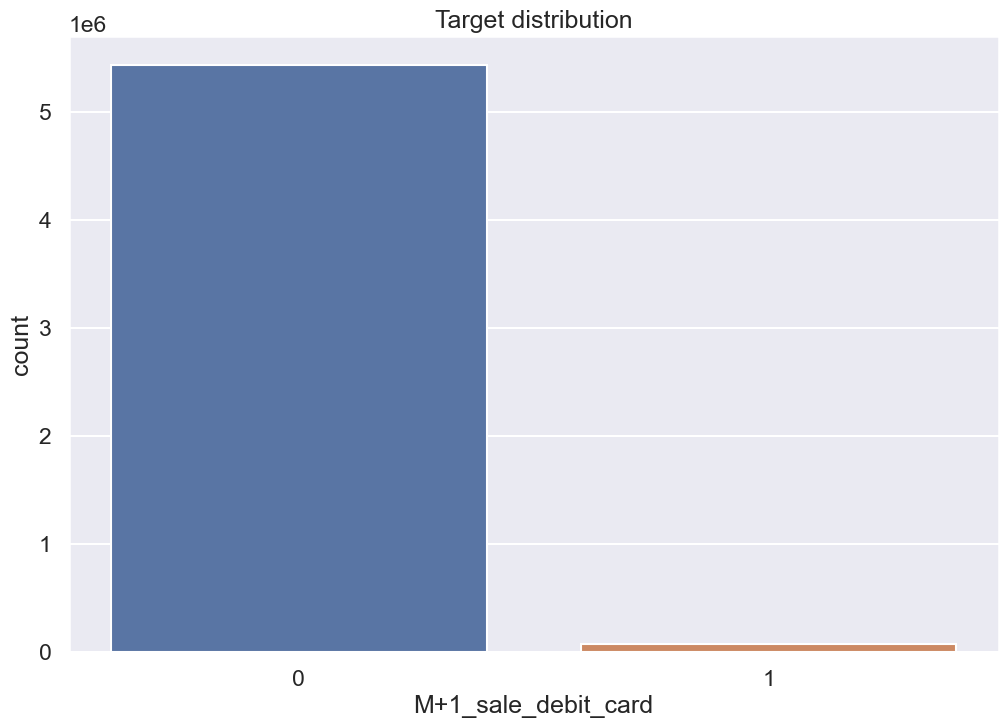

In [ ]:
sns.countplot(x=df[target])
plt.title('Target distribution')
plt.plot()

Observaciones:

En este caso, el target NO está nada balanzeado. Por lo tanto, creamos undersampling para balanzear la ratio de éxitos

# Undersampling (*)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

In [ ]:
# Aplicamos undersampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

In [ ]:
#Cada mes cojemos las ventas y cojemos aleatoriamente aquellso clientes que NO tuvieron ventas.

[]

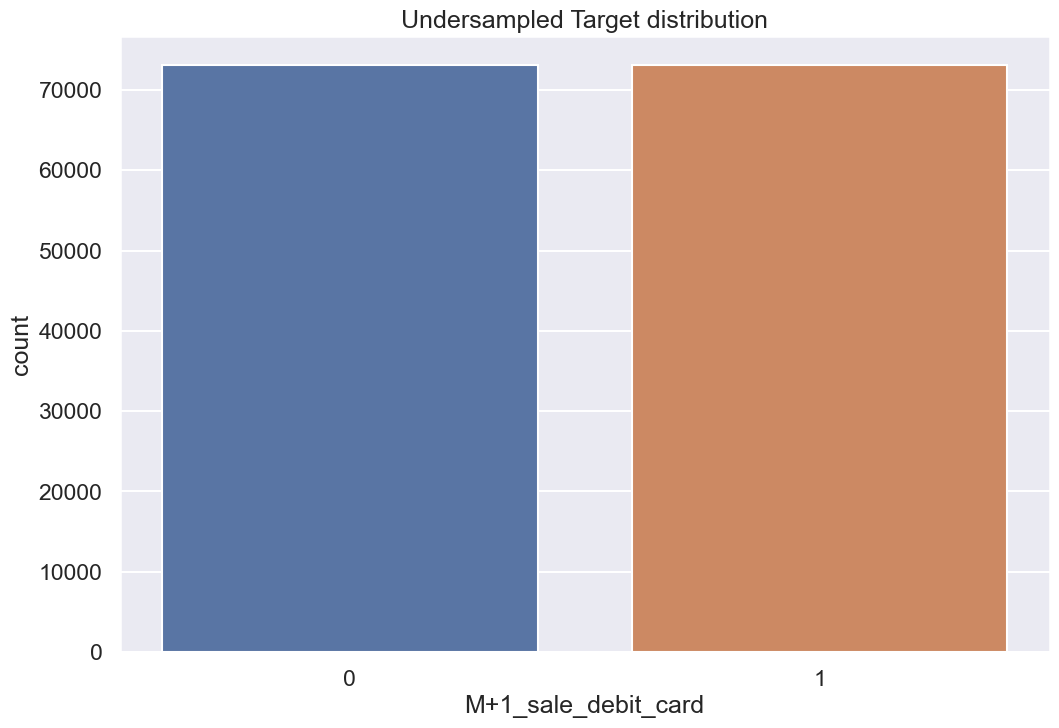

In [ ]:
# Mostramos la nueva distribución del target después del undersampling
sns.countplot(x=y_resampled)
plt.title('Undersampled Target distribution')
plt.plot()

# Split TRAIN-TEST

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [ ]:
# Dividimos X-y en Train (75%) y Test (25%)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

In [ ]:
print('Train set size:',X_train.shape[0])
print('Test set size:',X_test.shape[0])

Train set size: 109579
Test set size: 36527


# Rescaling

In [ ]:
df1 = df.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold
from scipy import stats


In [ ]:
# Estandarización: fit_transform() en train, transform() en test
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

X_train_std = pd.DataFrame(data = X_train_std, columns=X_train.columns, index=X_train.index)
X_test_std = pd.DataFrame(data = X_test_std, columns=X_test.columns, index=X_test.index)

In [ ]:
X_train_std.head(10)

,active_customer,region_code,age,salary,age_group,long_term_deposit,credit_card,pension_plan,payroll_account,emc_account,em_acount,tenencia,sale_em_acount,encoded_entry_channel,segment_01 - TOP,segment_02 - PARTICULARES,segment_03 - UNIVERSITARIO,segment_UNKNOWN,gender_H,gender_V,month_year_entry_2015-07,month_year_entry_2015-08,month_year_entry_2015-09,month_year_entry_2015-10,month_year_entry_2015-11,month_year_entry_2015-12,month_year_entry_2016-07,month_year_entry_2016-08,month_year_entry_2016-09,month_year_entry_2016-10,month_year_entry_2016-11,month_year_entry_2016-12,month_year_entry_2017-01,month_year_entry_2017-07,month_year_entry_2017-08,month_year_entry_2017-09,month_year_entry_2017-10,month_year_entry_2017-11,month_year_entry_2017-12,month_year_entry_2018-01,month_year_entry_2018-02,month_year_entry_2018-07,month_year_entry_2018-08,month_year_entry_2018-09,month_year_entry_2018-10,month_year_entry_2018-11
2239,-1.403059,-0.901025,-0.596825,-0.304214,-0.615656,-0.130937,-0.145411,-0.294,-0.367365,-0.278929,0.557411,-0.23917,-0.239766,1.119601,-0.133012,-0.877465,0.982800,-0.201266,1.056775,-1.056775,-0.175743,-0.180353,-0.175549,-0.211504,-0.171362,-0.115518,-0.169092,5.206187,-0.181884,-0.2334,-0.172544,-0.127985,-0.121496,-0.200750,-0.164555,-0.213638,-0.229835,-0.186807,-0.153640,-0.135757,-0.134356,-0.166649,-0.154293,-0.181509,-0.179,-0.131692
131806,0.712728,0.142900,0.869048,-0.207880,0.914775,-0.130937,-0.145411,-0.294,-0.367365,-0.278929,0.557411,0.91369,-0.239766,1.119601,-0.133012,1.139647,-1.017501,-0.201266,-0.946275,0.946275,-0.175743,-0.180353,-0.175549,-0.211504,-0.171362,-0.115518,-0.169092,-0.192079,-0.181884,-0.2334,-0.172544,-0.127985,-0.121496,-0.200750,-0.164555,-0.213638,-0.229835,-0.186807,-0.153640,-0.135757,-0.134356,-0.166649,-0.154293,-0.181509,-0.179,-0.131692
27421,0.712728,-1.348422,-0.759700,0.018923,-0.615656,-0.130937,-0.145411,-0.294,-0.367365,-0.278929,0.557411,-0.23917,-0.239766,-1.167871,-0.133012,-0.877465,0.982800,-0.201266,1.056775,-1.056775,-0.175743,-0.180353,-0.175549,-0.211504,-0.171362,-0.115518,-0.169092,-0.192079,-0.181884,-0.2334,-0.172544,-0.127985,-0.121496,4.981331,-0.164555,-0.213638,-0.229835,-0.186807,-0.153640,-0.135757,-0.134356,-0.166649,-0.154293,-0.181509,-0.179,-0.131692
122224,0.712728,0.142900,-0.352513,0.995218,-0.615656,-0.130937,-0.145411,-0.294,-0.367365,3.585139,0.557411,0.91369,-0.239766,1.119601,-0.133012,1.139647,-1.017501,-0.201266,1.056775,-1.056775,-0.175743,-0.180353,-0.175549,-0.211504,-0.171362,-0.115518,-0.169092,-0.192079,-0.181884,-0.2334,-0.172544,-0.127985,-0.121496,-0.200750,-0.164555,-0.213638,-0.229835,-0.186807,6.508708,-0.135757,-0.134356,-0.166649,-0.154293,-0.181509,-0.179,-0.131692
106961,0.712728,0.813994,2.090609,-0.116569,2.445206,-0.130937,-0.145411,-0.294,-0.367365,-0.278929,0.557411,-0.23917,-0.239766,1.119601,-0.133012,1.139647,-1.017501,-0.201266,-0.946275,0.946275,-0.175743,-0.180353,-0.175549,-0.211504,-0.171362,-0.115518,-0.169092,-0.192079,-0.181884,-0.2334,-0.172544,-0.127985,-0.121496,-0.200750,-0.164555,-0.213638,-0.229835,-0.186807,-0.153640,-0.135757,-0.134356,-0.166649,-0.154293,-0.181509,-0.179,-0.131692
119475,0.712728,0.739428,-0.922575,-0.140114,-0.615656,-0.130937,-0.145411,-0.294,-0.367365,-0.278929,0.557411,-0.23917,-0.239766,-1.167871,-0.133012,-0.877465,0.982800,-0.201266,1.056775,-1.056775,-0.175743,-0.180353,-0.175549,-0.211504,-0.171362,-0.115518,-0.169092,-0.192079,-0.181884,-0.2334,-0.172544,-0.127985,-0.121496,-0.200750,-0.164555,-0.213638,4.350943,-0.186807,-0.153640,-0.135757,-0.134356,-0.166649,-0.154293,-0.181509,-0.179,-0.131692
5644,0.712728,1.485089,-0.841138,-0.240162,-0.615656,-0.130937,-0.145411,-0.294,-0.367365,-0.278929,0.557411,-0.23917,-0.239766,1.119601,-0.133012,-0.877465,0.982800,-0.201266,-0.946275,0.946275,-0.175743,-0.180353,-0.175549,-0.211504,-0.171362,-0.115518,-0.169092,5.206187,-0.181884,-0.2334,-0.172544,-0.127985,-0.121496,-0.200750,-0.164555,-0.213638,-0.229835,-0.186

Guradamos el Scaler como Pickle para que este pueda ser utilizado en el Predict.

In [ ]:
import pickle

In [ ]:
# Guardamos el scaler para poder aplicarlo en el predict
pd.to_pickle(scaler, r"G:\.shortcut-targets-by-id\1bm75_bWu9x17MEqz4s0y41zSeZIOecxs\Capstone Project\EasyMoney\Project Files\Propensión compra\07_Scalers\V2_scaler_debit_card.pkl")

# TRAIN-VALIDA

## Torneo de Modelos

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [ ]:
# Calculo del AUC de un modelo sobre un dataset (X-y). Args: modelo a validar, X, y
def auc(model,X,y):
  model.fit(X,y)
  return roc_auc_score(y,model.predict_proba(X)[:,1])

# Calculo del AUC de un modelo sobre un dataset con Cross-Validation (X-y). Args: modelo a validar, X, y
def auc_cross_validation(model,X,y):
  cross_val = cross_val_score(model,
                              X, y,
                              cv=4,                 # Numero de folds que vamos a utilizar para validar
                              scoring='roc_auc'     # La metrica de validacion que se medira en cada train-valida
                              )
  return cross_val.mean()

Funciones para evaluar los resultados en el torneo de modelos: Detallamos en orden descendiente las puntuaciones del accuracy y del AUC.

In [ ]:
# Inicializa resultados
label_, auc_train_ , auc_valida_ = [], [], []

def evaluate_classification(model, X, y, label=None):
  if label is None:
    label=str(model)
  label_.append(label)

  auc_train = auc(model,X,y)
  auc_valida = auc_cross_validation(model,X,y)
  auc_train_.append(auc_train)
  auc_valida_.append(auc_valida)

  return pd.DataFrame({'Model': label_,
                      'AUC Train': auc_train_,
                      'AUC Cross-Valida': auc_valida_
                      }).sort_values('AUC Cross-Valida',ascending=False)

**TORNEO DE MODELOS**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
evaluate_classification(model=XGBClassifier(),
                        X=X_train_std, y=y_train)

,Model,AUC Train,AUC Cross-Valida
0,"XGBClassifier(base_score=None, booster=None, c...",0.912153,0.893326


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
evaluate_classification(model=RandomForestClassifier(),
                        X=X_train_std, y=y_train)

,Model,AUC Train,AUC Cross-Valida
0,"XGBClassifier(base_score=None, booster=None, c...",0.912153,0.893326
1,RandomForestClassifier(),0.998522,0.887963


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
evaluate_classification(model=LogisticRegression(),
                        X=X_train_std, y=y_train)

,Model,AUC Train,AUC Cross-Valida
0,"XGBClassifier(base_score=None, booster=None, c...",0.912153,0.893326
1,RandomForestClassifier(),0.998522,0.887963
2,LogisticRegression(),0.876302,0.875895


**Modelo mas competitivo**
El modelo con mayor puntuacion en un escenario de Validación es XGBoost Classifier. Pasaremos a hipeparametrizar el modelo y optimizar el resultado

## Hiperparametrizacion

* Utilizar RandomSearch para probar diferentes configuraciones de los parametros del modelo ganador en el torneo de modelos con el objetivo de mejorar el control del overfitting.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
parameters_hp = {
    'n_estimators': [10,30,50,70,100],
    'max_depth': [2,3,4,5,6,7],
    'bootstrap': [False, True],
    'min_samples_split': [1,2,3,4]
}

In [ ]:
search_hp = RandomizedSearchCV(estimator = XGBClassifier(),
                               param_distributions = parameters_hp,
                               scoring = 'roc_auc',                         # metrica a optimizar: AUC
                               cv = 4,                                      # numero de folds para cross-validation
                               n_iter = 5,                                 # numero de iteraciones, cada una testeara una configuracion distinta
                               n_jobs=-1,
                               verbose=True)

In [ ]:
search_hp.fit(X_train, y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
[18:28:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "bootstrap", "min_samples_split" } are not used.



RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [False, True],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [10, 30, 50, 70, 100]},
                   scoring='roc_auc', verbose=True)

In [ ]:
print("---- Results from Random Search -----")
print("\n The best estimator across ALL searched params:", search_hp.best_estimator_)
print("\n The best AUC:", search_hp.best_score_)
print("\n The best parameters across ALL searched params:\n", search_hp.best_params_)

---- Results from Random Search -----

 The best estimator across ALL searched params: XGBClassifier(base_score=None, booster=None, bootstrap=True, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, min_samples_split=4, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

 The best AUC: 0.8935345162064957

 The best parameters across ALL searched params:
 {'n_estimators': 100, 'min_samples_split': 4, 'max_depth': 7, 'bootstrap': T

## Modelo final

In [ ]:
best_model = search_hp.best_estimator_

In [ ]:
print('AUC Train:', auc(best_model, X_train, y_train))

[18:28:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "bootstrap", "min_samples_split" } are not used.

AUC Train: 0.9205280173934028


In [ ]:
print('AUC CV:', auc_cross_validation(best_model, X_train, y_train))

[18:28:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "bootstrap", "min_samples_split" } are not used.

[18:29:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "bootstrap", "min_samples_split" } are not used.

[18:29:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "bootstrap", "min_samples_split" } are not used.

[18:29:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "bootstrap", "min_samples_split" } are not used.

AUC CV: 0.8935345162064957


AUC Train y AUC Validacion: Overfitted.


# TEST

* Evaluación de las métricas de performance en TEST.


In [ ]:
y_train_pred = best_model.predict(X_train)                        # predicciones del modelo en los datos de TRAIN
y_test_pred = best_model.predict(X_test)                          # predicciones del modelo en los datos de TEST

In [ ]:
y_train_pred_proba = best_model.predict_proba(X_train)[:, 1]      # probabilidad de éxito (1) segun el modelo en los datos de TRAIN
y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]        # probabilidad de éxito (1) segun el modelo en los datos de TEST

**AUC y ROC Curve**

A continuación, ajustamos el modelo, obtenemos las probabilidades de predicción y calculamos las métricas de rendimiento relacionadas con la "ROC Curve" tanto para el conjunto de entrenamiento como para el conjunto de prueba.

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
auc_train = roc_auc_score(y_train, y_train_pred_proba)      # AUC en TRAIN
auc_test = roc_auc_score(y_test, y_test_pred_proba)         # AUC en TEST

In [ ]:
print('AUC Train:', round(auc_train,4))
print('AUC Test:', round(auc_test,4))

AUC Train: 0.9205
AUC Test: 0.8919


ROC Curve

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
# metrics for ROC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)

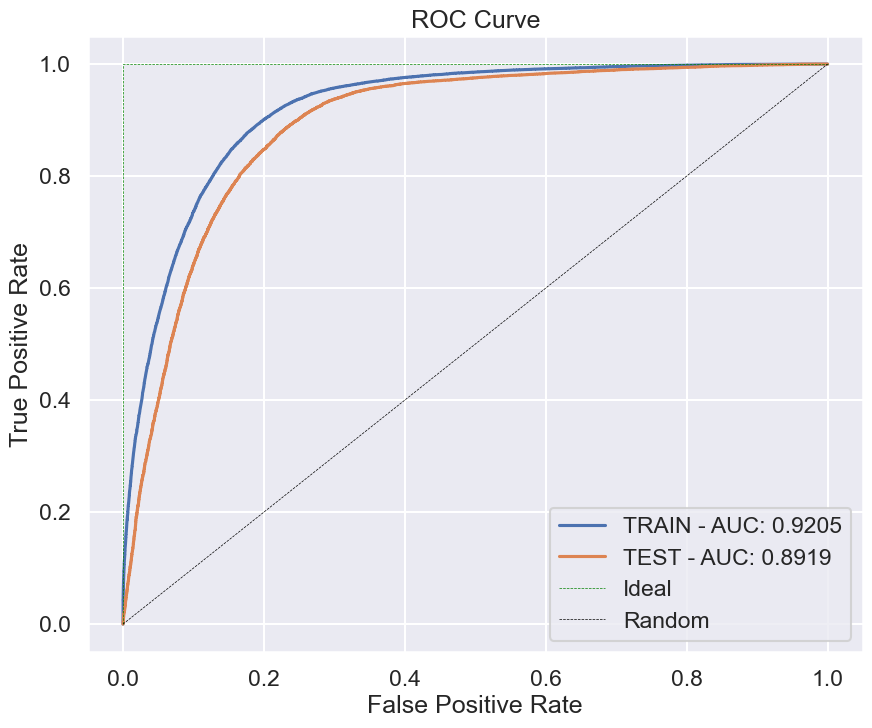

In [ ]:
#Plot
plt.figure(figsize=[10,8])
plt.plot(fpr_train, tpr_train, label='TRAIN - AUC: {:.4f}'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='TEST - AUC: {:.4f}'.format(auc_test))
plt.title('ROC Curve')
plt.plot([0,0,1],[0,1,1], color='green', linestyle='--', linewidth=0.5, label='Ideal')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', linewidth=0.5, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

AUC Train: 0.9205
AUC Test: 0.8919

--> Los resultados de este modelo, sugieren que el modelo ha aprendido patrones útiles en los datos de entrenamiento y ha logrado una buena generalización en los datos de prueba, lo que indica que es un modelo prometedor para la recomendación de debit card a los futuros clientes.

*Confusion Matrix*

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cm_test = confusion_matrix(y_test, y_test_pred)

[]

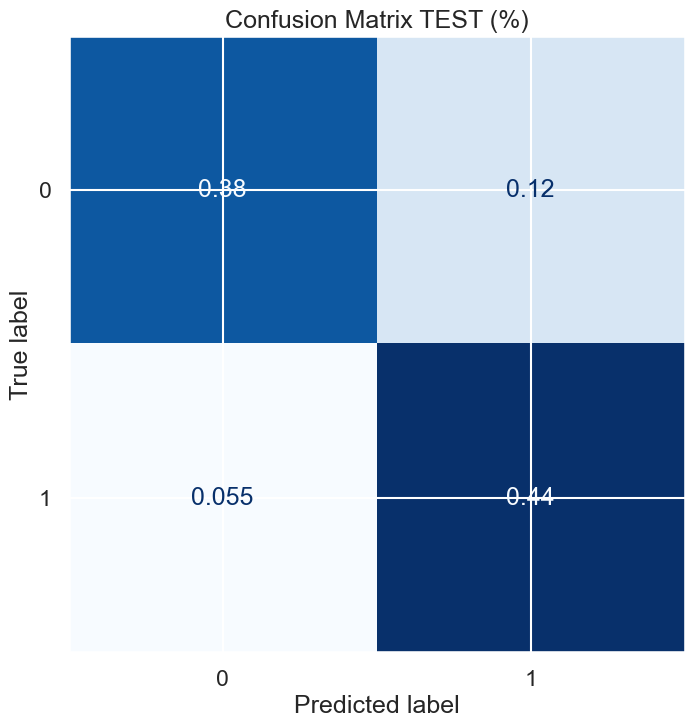

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=cm_test/len(y_test)).plot(colorbar = False, cmap = 'Blues')
plt.title('Confusion Matrix TEST (%)')
plt.plot()

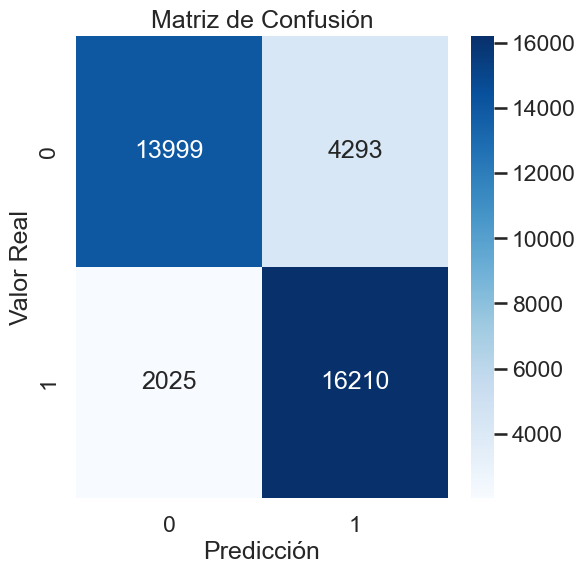

In [ ]:
from sklearn.metrics import confusion_matrix

# Aplicamos el umbral a las predicciones
threshold = 0.5
y_test_pred_binary = [1 if p >= threshold else 0 for p in y_test_pred]

# Calculamos la matriz de confusión
cm_test = confusion_matrix(y_test, y_test_pred_binary)

# Visualizamos la matriz de confusión
plt.figure(figsize=[6, 6])
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

13999  casos fueron clasificados correctamente como la clase 0 (verdaderos negativos).

4293 casos fueron clasificados incorrectamente como la clase 1 (falsos positivos).

2025 casos fueron clasificados incorrectamente como la clase 0 (falsos negativos).

16210 casos fueron clasificados correctamente como la clase 1 (verdaderos positivos).

**Accuracy, Precision, Recall y F1-Score**

Para interpretar los valores obtenidos de la matriz de manera mas precisa, procedemos a estudiar **Accuracy, Precision, Recall y F1-Score** que brindarán una visión más completa del desempeño del modelo en términos de clasificación correcta de las dos clases.

In [ ]:
TN = cm_test[0,0]
TP = cm_test[1,1]
FP = cm_test[0,1]
FN = cm_test[1,0]
total = len(y_test)

In [ ]:
# Rellenar
accuracy_test = (TN+TP)/total
precision_test = TP/(TP+FP)
recall_test = TP/(TP+FN)
f1_test = 2/(1/recall_test + 1/precision_test)

In [ ]:
print('Accuracy:',round(accuracy_test,4))
print('Precision:',round(precision_test,4))
print('Recall:',round(recall_test,4))
print('F1-score:',round(f1_test,4))

Accuracy: 0.827
Precision: 0.7906
Recall: 0.8889
F1-score: 0.8369


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy:', round( accuracy_score(y_test, y_test_pred),4))
print('Precision:', round( precision_score(y_test, y_test_pred), 4))
print('Recall:', round( recall_score(y_test, y_test_pred), 4))
print('F1-score:', round(f1_score(y_test, y_test_pred), 4))

Accuracy: 0.827
Precision: 0.7906
Recall: 0.8889
F1-score: 0.8369


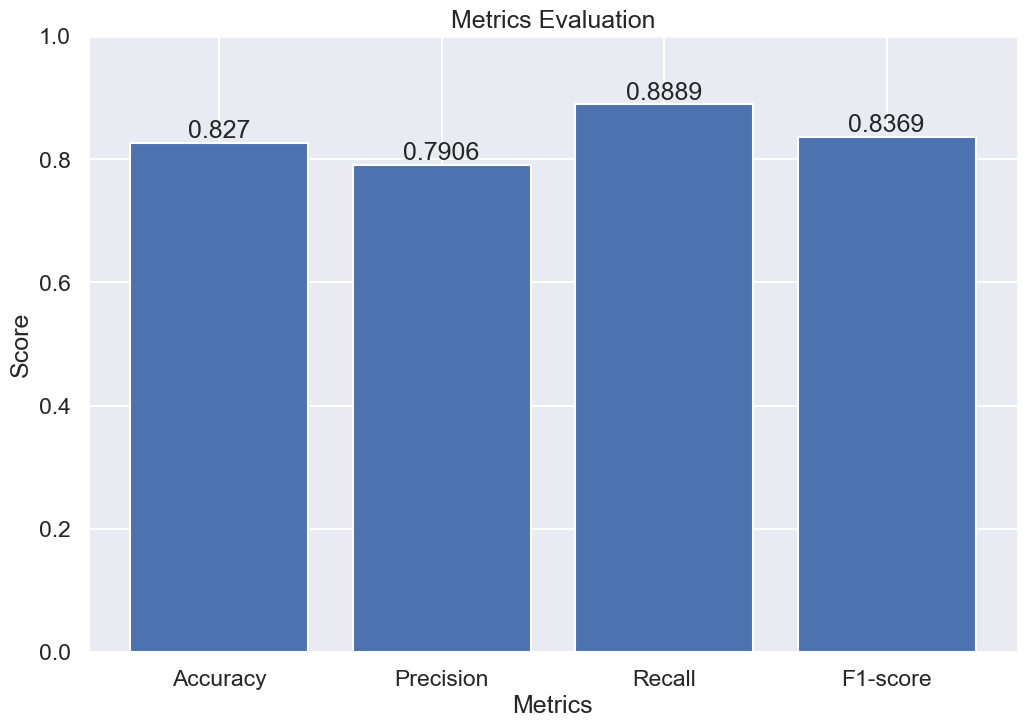

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular las métricas de clasificación
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Crear un array con los nombres de las métricas
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Crear un array con los valores de las métricas
values = [accuracy, precision, recall, f1]

# Crear el gráfico de barras
plt.bar(metrics, values)
plt.ylim([0, 1])  # Establecer el rango del eje y entre 0 y 1
plt.title('Metrics Evaluation')
plt.xlabel('Metrics')
plt.ylabel('Score')

# Añadir los valores numéricos encima de cada barra
for i, v in enumerate(values):
    plt.text(i, v, str(round(v, 4)), ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

Accuracy: 0,827
Precision: 0,7906
Recall: 0,8889
F1-score: 0,8369

Accuracy (Exactitud): Hemos obtenido una precisión del 82.7%. Esto significa que el 82.7% de las veces hemos acertado al predecir correctamente si un cliente debería recibir la recomendación de adquirir una tarjeta de débito o no.

Precision (Precisión): Nuestra precisión del modelo es del 79.06%. Esta métrica muestra qué tan bien hemos identificado correctamente los casos positivos, es decir, cuántos de los clientes a los que les recomendamos la tarjeta de débito realmente están interesados en ella.

Recall (Recuperación): El recall, también conocido como tasa de verdaderos positivos, es del 88.89%. Esto significa que hemos sido capaces de identificar el 88.89% de todos los casos positivos (clientes interesados en la tarjeta de débito) presentes en el conjunto de datos.

F1-score: Nuestro valor del F1-score es de 0.8369. El F1-score es una medida que combina tanto la precisión como el recall en una sola métrica. Cuanto más cercano a 1 sea el F1-score, mejor es el rendimiento general de nuestro modelo.


Distribución del Error

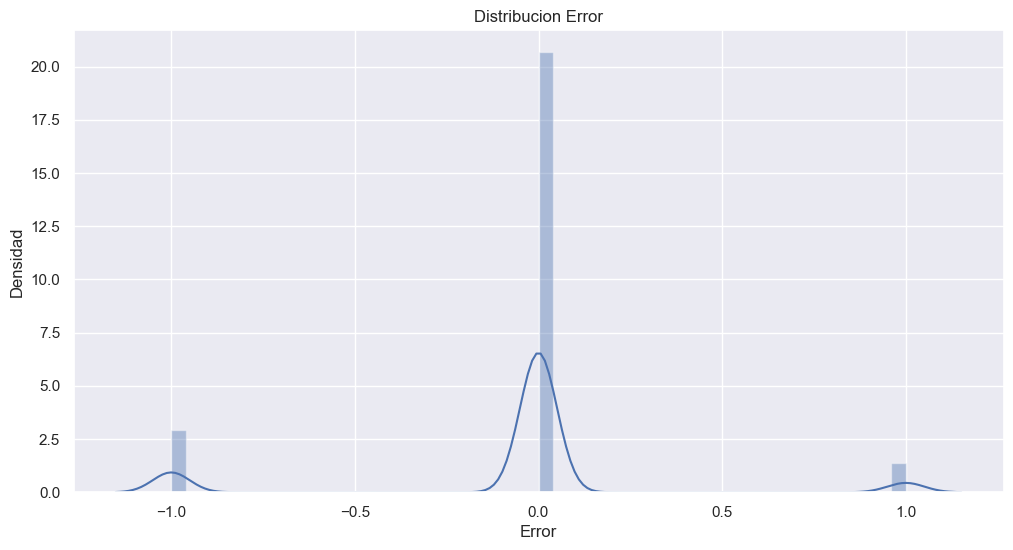

In [ ]:
import seaborn as sns

# Calculamos el error como la diferencia entre las etiquetas reales y las predichas
error = y_test - y_test_pred

# Visualizamos la distribución del error
sns.set(rc={'figure.figsize':(12,6)})
sns.distplot(error).set_title('Distribucion Error')
plt.xlabel('Error')
plt.ylabel('Densidad')
plt.show()

In [ ]:
round(pd.Series(error).describe(),2)

count    36527.00
mean        -0.06
std          0.41
min         -1.00
25%          0.00
50%          0.00
75%          0.00
max          1.00
Name: M+1_sale_debit_card, dtype: float64

Error Interval:

In [ ]:
confidence=95
z = (100-confidence)/2
print("Intervalo del error (confianza",confidence,"%):",round(np.percentile(error, 100-z),1),"/",round(np.percentile(error, z),1))

Intervalo del error (confianza 95 %): 1.0 / -1.0


# INTERPRETABILITY

Como el dataset fue estandarizado, los coeficientes resultantes de la regresion lineal corresponden a la importancia de cada variable en el resultado del modelo.

In [ ]:
!pip install shap

In [ ]:
import seaborn as sns
from matplotlib import rcParams
from xgboost import plot_importance, plot_tree
import shap

**Feature Importance**

Estudiamos la importancia de cada variable a partir de Fscore en el modelo de clasificación utilizado.

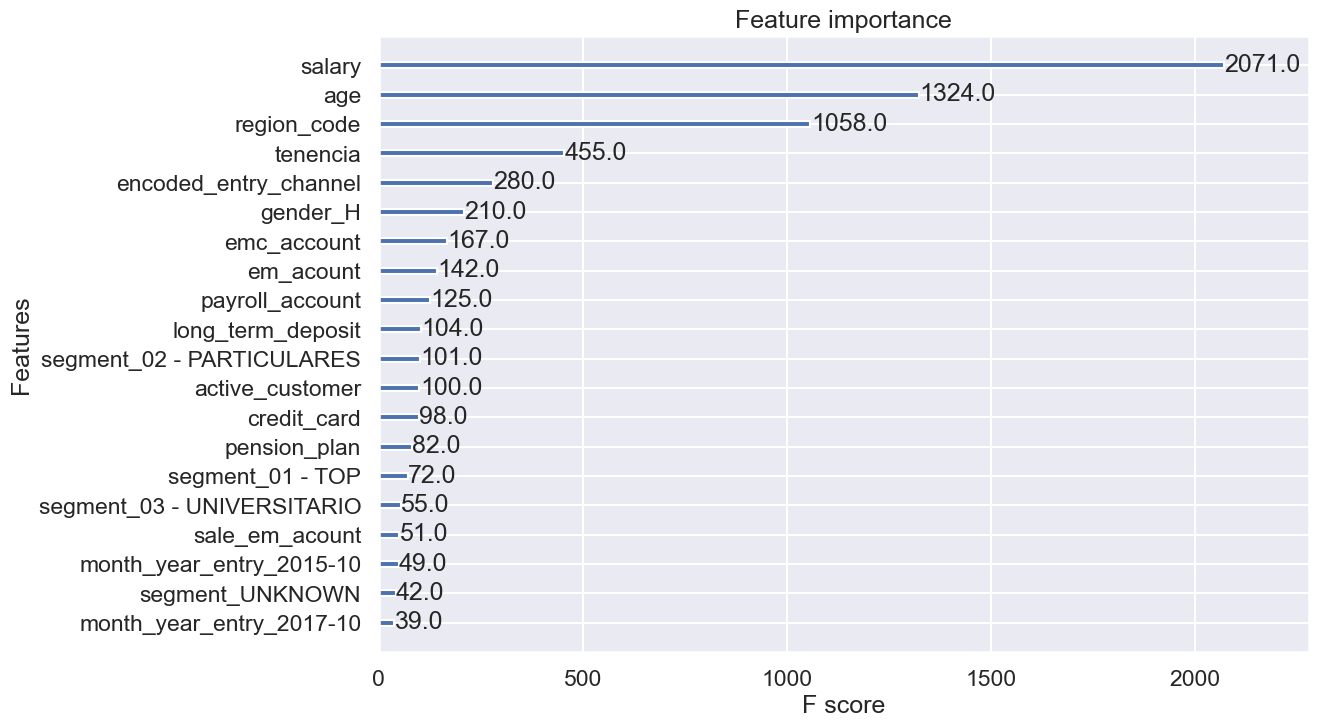

In [ ]:
rcParams['figure.figsize'] = 12, 8
sns.set(context="talk")
plot_importance(best_model, max_num_features=20, importance_type='weight')
plt.show()

Observamos como aquellas caracteristicas mas importantes en base individual asi como con su interacción conjunta son:

*salary*

*age*

*region_code*

*tenencia*

*encoded_entry_channel*


**SHAP Values**

Los Shap values nos indican el impacto que tiene cada característica en la predicción. Un valor positivo significa que esa característica contribuye a aumentar la predicción, mientras que un valor negativo significa que contribuye a disminuirla.

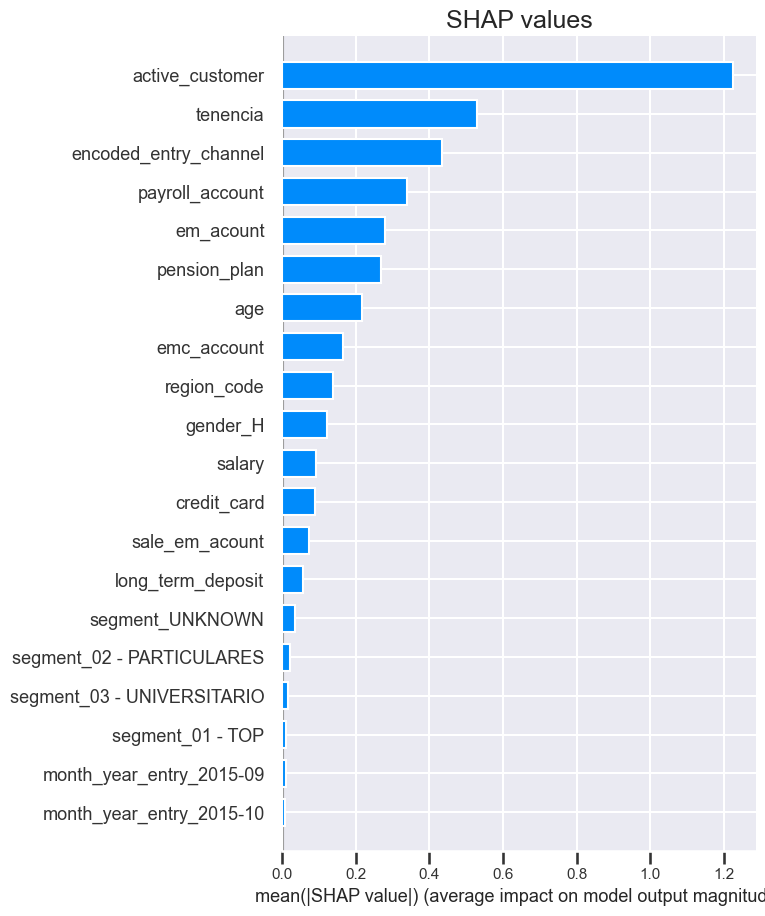

In [ ]:
#SHAP value: peso en el output final
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)
plt.title('SHAP values')
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=20)

Los SHAP values nos indican ademas el sentido del impacto que tiene la variable en la predicción (positivo/negativo):
* Rojo a la derecha = POSITIVO (+)
* Rojo a la izquierda = NEGATIVO (-)

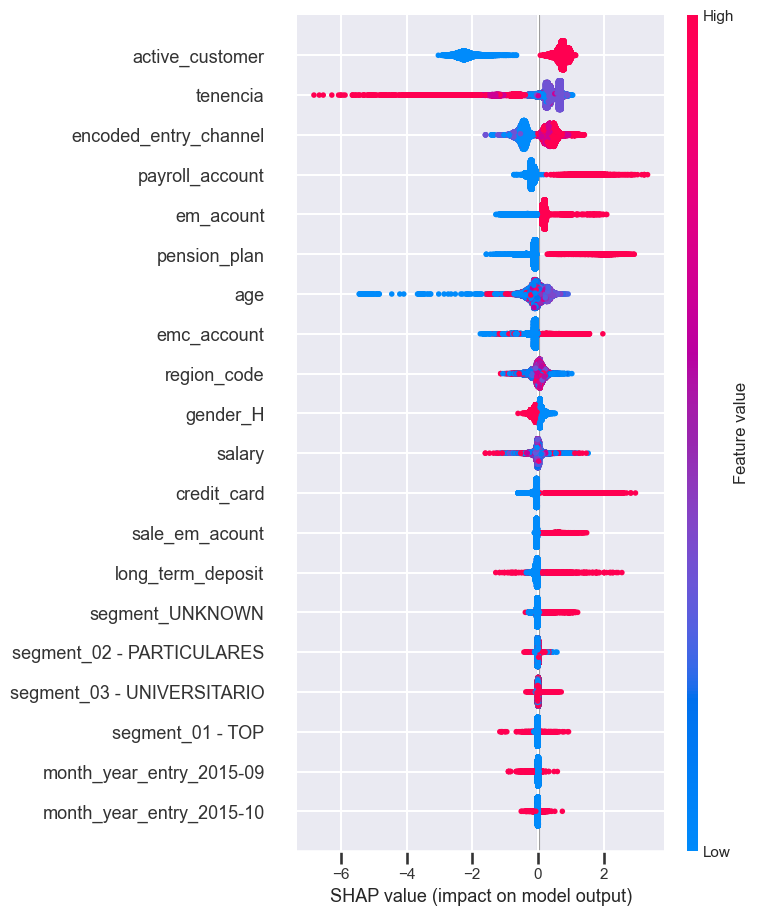

In [ ]:
shap.summary_plot(shap_values, X_test)

Cuanto mayor sea el valor absoluto del Shap value, mayor será la influencia de las características en la predicción.

En nuestro caso active_customer, tenencia, encoded_entry_chanel, age, payroll_account serian las varibles que mas nos potencian el modelo.



PICKLE

In [ ]:
import pickle

In [ ]:
# Guardamos el modelo para poder aplicarlo en el predict
pd.to_pickle(best_model, r"G:\.shortcut-targets-by-id\1bm75_bWu9x17MEqz4s0y41zSeZIOecxs\Capstone Project\EasyMoney\Project Files\Propensión compra\06_Models_pickle\V2_debit_card_model.pkl")